In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
#from imblearn.over_sampling import SMOTE
import numpy as np
from sklearn.preprocessing import MinMaxScaler
#from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
#from tensorflow.keras.layers import Dense,Dropout
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
#from keras.models import Sequential
#from tensorflow.keras.optimizers import Adam,RMSprop
from sklearn.model_selection import GridSearchCV,KFold

In [10]:
forestfire_data=pd.read_csv("forestfires (1).csv")
forestfire_data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [11]:
forestfire_data.shape

(517, 31)

In [12]:
forestfire_data.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [13]:
forestfire_data.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [14]:
forestfire_data.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


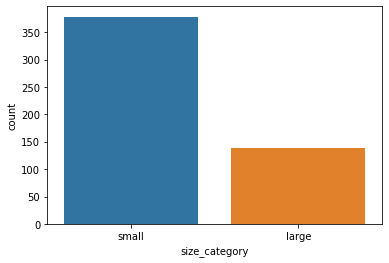

In [15]:
sns.countplot(forestfire_data['size_category'])
plt.show()

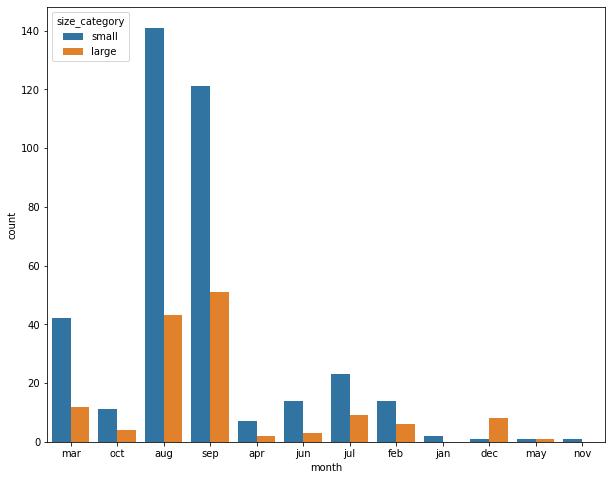

In [16]:
plt.figure(figsize=(10,8))
sns.countplot(x = forestfire_data['month'],hue=forestfire_data['size_category'])
plt.show()

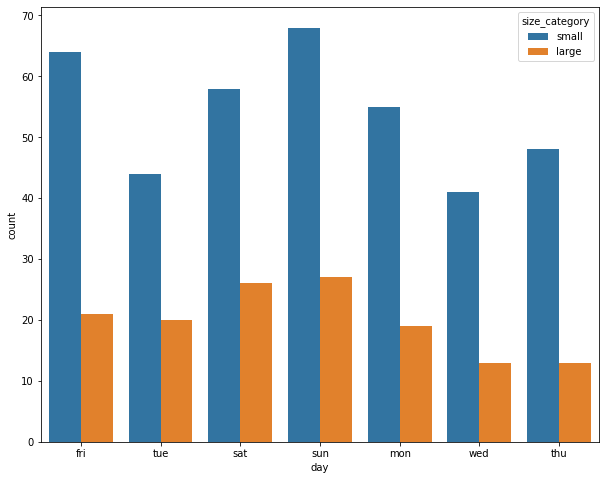

In [17]:
plt.figure(figsize=(10,8))
sns.countplot(x = forestfire_data['day'],hue=forestfire_data['size_category'])
plt.show()

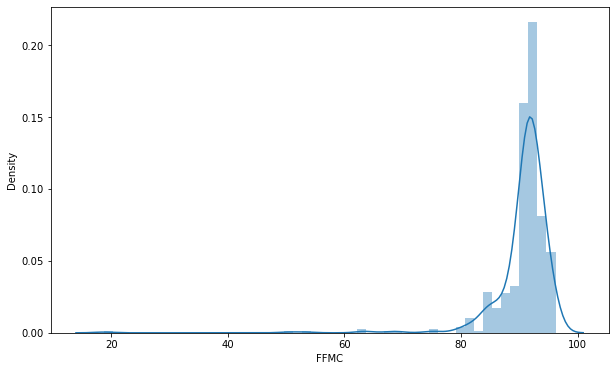

In [18]:
plt.figure(figsize=(10,6))
sns.distplot(forestfire_data['FFMC'],)
plt.show()

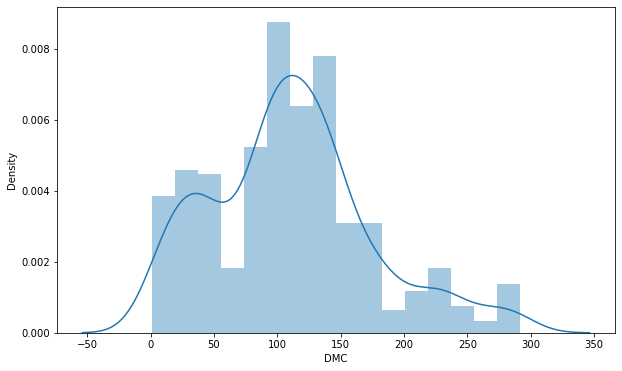

In [19]:
plt.figure(figsize=(10,6))
sns.distplot(forestfire_data['DMC'],)
plt.show()

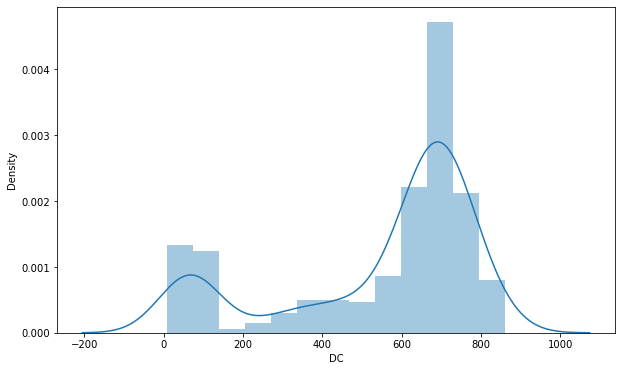

In [20]:
plt.figure(figsize=(10,6))
sns.distplot(forestfire_data['DC'],)
plt.show()

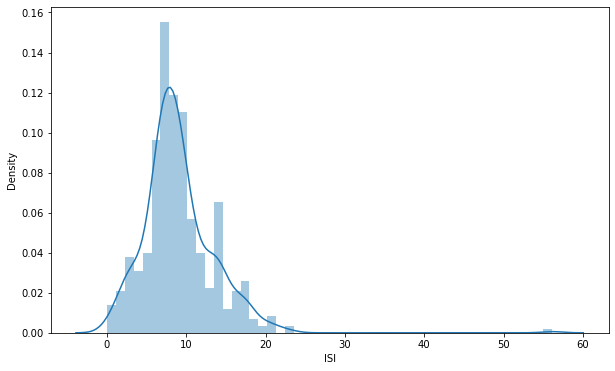

In [21]:
plt.figure(figsize=(10,6))
sns.distplot(forestfire_data['ISI'],)
plt.show()

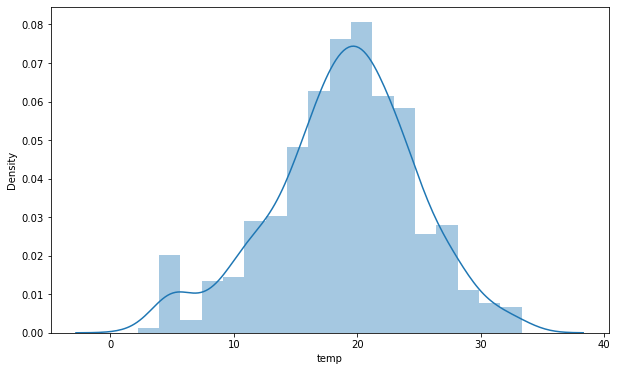

In [22]:
plt.figure(figsize=(10,6))
sns.distplot(forestfire_data['temp'],)
plt.show()

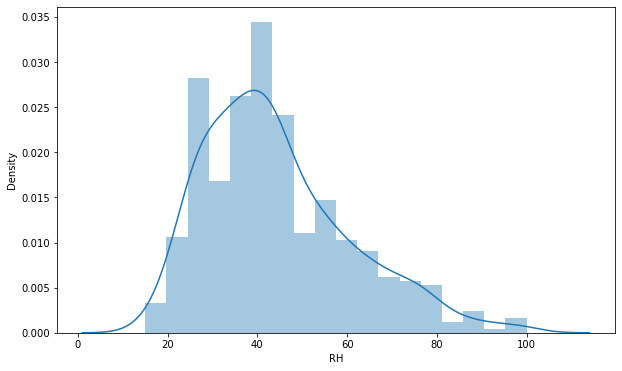

In [23]:
plt.figure(figsize=(10,6))
sns.distplot(forestfire_data['RH'],)
plt.show()

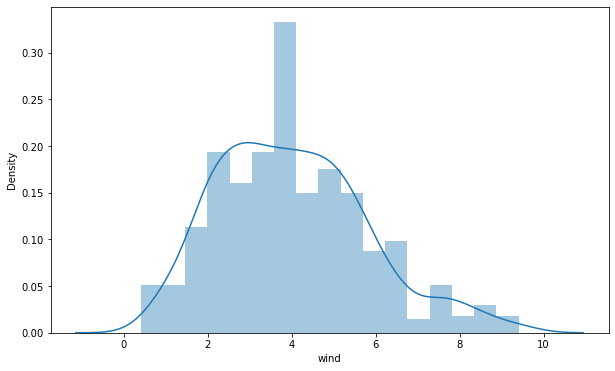

In [24]:
plt.figure(figsize=(10,6))
sns.distplot(forestfire_data['wind'],)
plt.show()

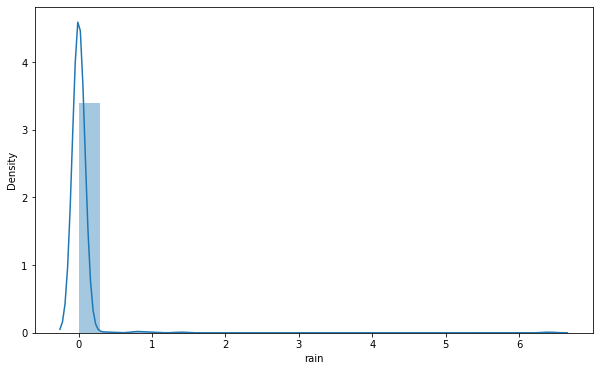

In [25]:
plt.figure(figsize=(10,6))
sns.distplot(forestfire_data['rain'],)
plt.show()

In [26]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
forestfire_data['size_category']=label_encoder.fit_transform(forestfire_data['size_category'])

In [27]:
forestfire_data.pop('month')

0      mar
1      oct
2      oct
3      mar
4      mar
      ... 
512    aug
513    aug
514    aug
515    aug
516    nov
Name: month, Length: 517, dtype: object

In [28]:
forestfire_data.pop('day')

0      fri
1      tue
2      sat
3      fri
4      sun
      ... 
512    sun
513    sun
514    sun
515    sat
516    tue
Name: day, Length: 517, dtype: object

In [29]:
x=forestfire_data.iloc[:,0:28]
y=forestfire_data.iloc[:,28]

In [30]:
x

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
y

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int32

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [33]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [34]:
#!pip install tensorflow

In [35]:
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam

In [36]:
model=Sequential()

In [37]:
model.add(Dense(units=10,activation='relu',kernel_initializer='he_uniform',input_dim=28))
#adding 2nd hidden layer
model.add(Dense(units=8,activation='relu',kernel_initializer='he_uniform'))
#adding output layer
model.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))

In [39]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [40]:
model.fit(x_train,y_train,batch_size=10,epochs=150,validation_split=0.33)


Epoch 1/150
28/28 [==============================] - 2s 19ms/step - loss: 0.9243 - accuracy: 0.2754 - val_loss: 0.8291 - val_accuracy: 0.2993
Epoch 2/150
28/28 [==============================] - 0s 4ms/step - loss: 0.8292 - accuracy: 0.3261 - val_loss: 0.7673 - val_accuracy: 0.4088
Epoch 3/150
28/28 [==============================] - 0s 5ms/step - loss: 0.7648 - accuracy: 0.4312 - val_loss: 0.7264 - val_accuracy: 0.5328
Epoch 4/150
28/28 [==============================] - 0s 5ms/step - loss: 0.7189 - accuracy: 0.5543 - val_loss: 0.6938 - val_accuracy: 0.5547
Epoch 5/150
28/28 [==============================] - 0s 4ms/step - loss: 0.6820 - accuracy: 0.5978 - val_loss: 0.6705 - val_accuracy: 0.6277
Epoch 6/150
28/28 [==============================] - 0s 5ms/step - loss: 0.6524 - accuracy: 0.6630 - val_loss: 0.6511 - val_accuracy: 0.6934
Epoch 7/150
28/28 [==============================] - 0s 5ms/step - loss: 0.6244 - accuracy: 0.6957 - val_loss: 0.6360 - val_accuracy: 0.7080
Epoch 8/150


Epoch 59/150
28/28 [==============================] - 0s 5ms/step - loss: 0.1208 - accuracy: 0.9638 - val_loss: 0.3441 - val_accuracy: 0.8613
Epoch 60/150
28/28 [==============================] - 0s 4ms/step - loss: 0.1148 - accuracy: 0.9674 - val_loss: 0.3380 - val_accuracy: 0.8686
Epoch 61/150
28/28 [==============================] - 0s 5ms/step - loss: 0.1123 - accuracy: 0.9710 - val_loss: 0.3332 - val_accuracy: 0.8686
Epoch 62/150
28/28 [==============================] - 0s 5ms/step - loss: 0.1061 - accuracy: 0.9710 - val_loss: 0.3356 - val_accuracy: 0.8686
Epoch 63/150
28/28 [==============================] - 0s 7ms/step - loss: 0.1029 - accuracy: 0.9783 - val_loss: 0.3326 - val_accuracy: 0.8686
Epoch 64/150
28/28 [==============================] - 0s 4ms/step - loss: 0.0993 - accuracy: 0.9746 - val_loss: 0.3334 - val_accuracy: 0.8686
Epoch 65/150
28/28 [==============================] - 0s 5ms/step - loss: 0.0949 - accuracy: 0.9783 - val_loss: 0.3342 - val_accuracy: 0.8686
Epoch 

28/28 [==============================] - 0s 7ms/step - loss: 0.0180 - accuracy: 1.0000 - val_loss: 0.3572 - val_accuracy: 0.9051
Epoch 117/150
28/28 [==============================] - 0s 5ms/step - loss: 0.0181 - accuracy: 1.0000 - val_loss: 0.3579 - val_accuracy: 0.9124
Epoch 118/150
28/28 [==============================] - 0s 5ms/step - loss: 0.0171 - accuracy: 1.0000 - val_loss: 0.3643 - val_accuracy: 0.9124
Epoch 119/150
28/28 [==============================] - 0s 5ms/step - loss: 0.0174 - accuracy: 1.0000 - val_loss: 0.3643 - val_accuracy: 0.9051
Epoch 120/150
28/28 [==============================] - 0s 5ms/step - loss: 0.0173 - accuracy: 1.0000 - val_loss: 0.3629 - val_accuracy: 0.9124
Epoch 121/150
28/28 [==============================] - 0s 5ms/step - loss: 0.0161 - accuracy: 1.0000 - val_loss: 0.3632 - val_accuracy: 0.9051
Epoch 122/150
28/28 [==============================] - 0s 4ms/step - loss: 0.0151 - accuracy: 1.0000 - val_loss: 0.3629 - val_accuracy: 0.9124
Epoch 123/150

In [41]:
y_pred=model.predict(x_test)

y_pred

4/4 [==============================] - 0s 3ms/step


array([[4.5340058e-01],
       [9.9523872e-01],
       [9.9997532e-01],
       [7.1094172e-11],
       [9.9988669e-01],
       [9.9809176e-01],
       [9.9983203e-01],
       [9.9986857e-01],
       [9.9046808e-01],
       [9.9968070e-01],
       [9.9985766e-01],
       [3.5717241e-03],
       [1.0000000e+00],
       [9.8426229e-01],
       [5.2610668e-03],
       [8.5625046e-01],
       [9.9830461e-01],
       [9.5366815e-08],
       [9.9969792e-01],
       [6.5494239e-02],
       [8.3846921e-01],
       [9.9996006e-01],
       [9.9954361e-01],
       [9.9992621e-01],
       [1.5534006e-12],
       [9.9969482e-01],
       [9.9995238e-01],
       [9.9691176e-01],
       [9.9998719e-01],
       [9.9992448e-01],
       [9.9991387e-01],
       [9.8844206e-01],
       [9.9952745e-01],
       [6.3595074e-01],
       [9.9967271e-01],
       [4.9778482e-26],
       [8.2553250e-01],
       [9.9376100e-01],
       [0.0000000e+00],
       [9.9889952e-01],
       [9.3438048e-06],
       [9.616119

In [42]:
scores = model.evaluate(x_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

4/4 [==============================] - 0s 3ms/step - loss: 0.8632 - accuracy: 0.8942
accuracy: 89.42%
